# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [515]:
# Parameters
m = 2
A = 0.01#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [516]:
res=m;
N=2.0^m*500#1000.0#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0/10.0#100.0*2^m*10
Tf=Nt*dt; #final time
print(Tf)

0.1

In [517]:
print(N)

2000.0

In [518]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.0005
dt =0.0005
dx/dt =1.0


In [519]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [520]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [521]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
#T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.0005
the time step is 0.0005


In [522]:
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [530]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.1#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4);

In [531]:
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

"""y0=[0]
state_array[4:L-3,3] = n_rk4wrapper(psi_RHS,y0,initX[4:L-3],0,derpsi_func,state_array[4:L-3,:])
"""
state_array = ghost(state_array);

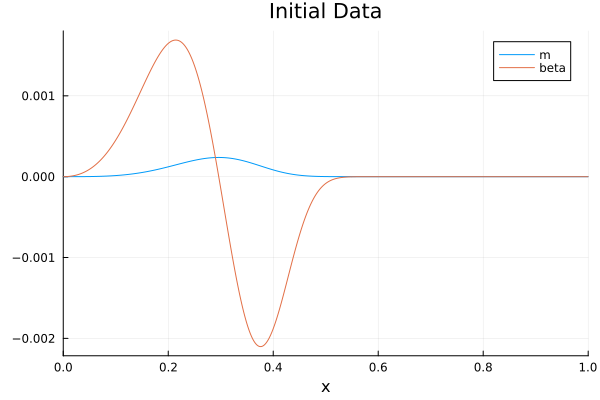

In [532]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,3:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [511]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/time_step0.csv"

In [512]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [513]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


# DDer

In [316]:
aux=zeros(L-6)
i=1
j=4
for xx in initX1
    
    aux[i] = DDer(state_array,j,4,initX)
    i=i+1
    j=j+1
end

In [297]:
aux2=zeros(L-6)
i=1
j=4
newdata=zeros(L,4)
newdata[4:L-3,4]=aux
for xx in initX1
    
    aux2[i] = DDer(newdata,j,4,initX)
    i=i+1
    j=j+1
end

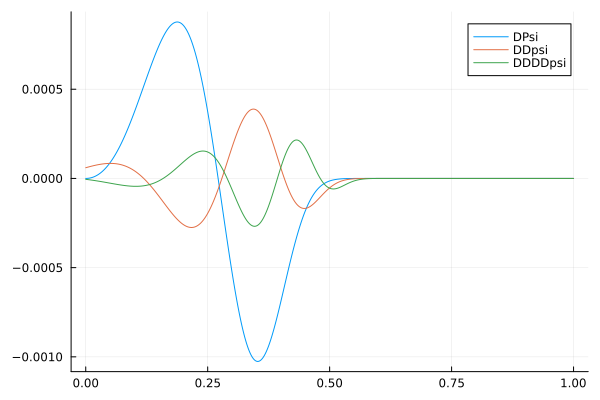

In [301]:
plot(initX1, [state_array[4:L-3,4] aux aux2],labels=["DPsi" "DDpsi" "DDDDpsi"])

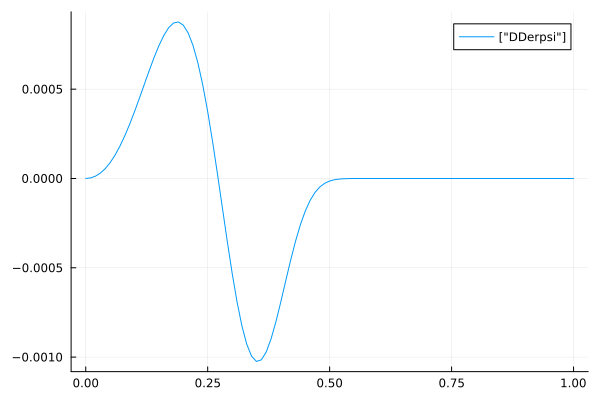

In [129]:
plot(initX1, aux,labels=["DDerpsi"])

 ## Time evolution

fixed grid

In [122]:
finaltime=1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

k1 = [0.0 0.0 0.0 -0.0006931221536916744 0.0; 0.0 0.0 0.0 -0.0005110331714235206 0.0; 0.0 0.0 0.0 -0.0002782453424787291 0.0; 0.0 0.0 0.0 2.2086702175232067e-8 0.0; 0.0 0.0 0.0 0.0003185498696786677 0.0; 0.0 0.0 0.0 0.0006721187600102235 0.0; 0.0 0.0 0.0 0.0010555095112563177 0.0; 0.0 0.0 0.0 0.0014613106615460924 0.0; 0.0 0.0 0.0 0.0018798434144696344 0.0; 0.0 0.0 0.0 0.0022990238128392172 0.0; 0.0 0.0 0.0 0.0027043360383754967 0.0; 0.0 0.0 0.0 0.0030789225527135507 0.0; 0.0 0.0 0.0 0.003403821852682366 0.0; 0.0 0.0 0.0 0.003658383485047852 0.0; 0.0 0.0 0.0 0.003820887149873205 0.0; 0.0 0.0 0.0 0.003869386593495114 0.0; 0.0 0.0 0.0 0.0037827887668051693 0.0; 0.0 0.0 0.0 0.0035421637124555135 0.0; 0.0 0.0 0.0 0.0031322603865253868 0.0; 0.0 0.0 0.0 0.002543178062618429 0.0; 0.0 0.0 0.0 0.0017721126728616977 0.0; 0.0 0.0 0.0 0.0008250638248742018 0.0; 0.0 0.0 0.0 -0.0002816462108073525 0.0; 0.0 0.0 0.0 -0.0015202217705217076 0.0; 0.0 0.0 0.0 -0.0028508150717171292 0.0; 0.0 0.0 0.0 -0.004

[0.0 0.0 0.0 -0.0005959592045980768 0.0; 0.0 0.0 0.0 -0.0003952664337623567 0.0; 0.0 0.0 0.0 -0.0001429716961119235 0.0; 0.0 0.0 0.0 0.00015462177349188482 0.0; 0.0 0.0 0.0 0.0004912107401877306 0.0; 0.0 0.0 0.0 0.0008604919691142761 0.0; 0.0 0.0 0.0 0.001256162225410184 0.0; 0.0 0.0 0.0 0.0016696891778355846 0.0; 0.0 0.0 0.0 0.0020902071381825944 0.0; 0.0 0.0 0.0 0.0025044165955322994 0.0; 0.0 0.0 0.0 0.00289661044423957 0.0; 0.0 0.0 0.0 0.003248838602254402 0.0; 0.0 0.0 0.0 0.0035412311448611167 0.0; 0.0 0.0 0.0 0.003752511623117508 0.0; 0.0 0.0 0.0 0.003860726714503211 0.0; 0.0 0.0 0.0 0.003844207255600506 0.0; 0.0 0.0 0.0 0.0036827645074091453 0.0; 0.0 0.0 0.0 0.0033591075968867666 0.0; 0.0 0.0 0.0 0.002860445237374031 0.0; 0.0 0.0 0.0 0.0021802067340499784 0.0; 0.0 0.0 0.0 0.0013197851065328832 0.0; 0.0 0.0 0.0 0.0002901707373283526 0.0; 0.0 0.0 0.0 -0.0008866895800594506 0.0; 0.0 0.0 0.0 -0.0021770015555160455 0.0; 0.0 0.0 0.0 -0.003534910861646035 0.0; 0.0 0.0 0.0 -0.00490317915

 0.0 0.0 0.002598013672478881 0.0; 0.0 0.0 0.0 0.0018653187935898455 0.0; 0.0 0.0 0.0 0.0012606915422038593 0.0; 0.0 0.0 0.0 0.0007991064666759447 0.0; 0.0 0.0 0.0 0.00047289788413218837 0.0; 0.0 0.0 0.0 0.0002598565689231117 0.0; 0.0 0.0 0.0 0.00013173774851405615 0.0; 0.0 0.0 0.0 6.115332501033396e-5 0.0; 0.0 0.0 0.0 2.5766221377423554e-5 0.0; 0.0 0.0 0.0 9.755516356273495e-6 0.0; 0.0 0.0 0.0 3.2833047311172678e-6 0.0; 0.0 0.0 0.0 9.72609563625682e-7 0.0; 0.0 0.0 0.0 2.5270915297132125e-7 0.0; 0.0 0.0 0.0 5.854198287011937e-8 0.0; 0.0 0.0 0.0 1.2774581334380588e-8 0.0; 0.0 0.0 0.0 2.817463150902838e-9 0.0; 0.0 0.0 0.0 6.05209696267157e-10 0.0; 0.0 0.0 0.0 9.838494775305662e-11 0.0; 0.0 0.0 0.0 3.5302914152878163e-12 0.0; 0.0 0.0 0.0 -3.1882941654557275e-12 0.0; 0.0 0.0 0.0 -7.397341529702889e-13 0.0; 0.0 0.0 0.0 -6.115178119539388e-14 0.0; 0.0 0.0 0.0 -4.730856746835605e-14 0.0; 0.0 0.0 0.0 -3.0209411861796615e-14 0.0; 0.0 0.0 0.0 -6.261610542059128e-15 0.0; 0.0 0.0 0.0 2.21455591249

 0.0 0.0 7.628299283384602e-18 0.0; 0.0 0.0 0.0 4.534787817692582e-18 0.0; 0.0 0.0 0.0 2.4533061561324046e-18 0.0; 0.0 0.0 0.0 1.1543203223036557e-18 0.0; 0.0 0.0 0.0 4.326300892987809e-19 0.0; 0.0 0.0 0.0 1.0534320961826393e-19 0.0; 0.0 0.0 0.0 9.085266304635126e-21 0.0; 0.0 0.0 0.0 -7.301935340595634e-21 0.0; 0.0 0.0 0.0 -9.49765900159185e-20 0.0; 0.0 0.0 0.0 -4.050968924198236e-19 0.0; 0.0 0.0 0.0 -1.088821037250801e-18 0.0]k2 = [0.0 0.0 0.0 -0.00031243624377917537 0.0; 0.0 0.0 0.0 -6.388785585684275e-5 0.0; 0.0 0.0 0.0 0.00023650690658638977 0.0; 0.0 0.0 0.0 0.0005796436363816228 0.0; 0.0 0.0 0.0 0.0009564179263599568 0.0; 0.0 0.0 0.0 0.0013577253693524923 0.0; 0.0 0.0 0.0 0.0017744615581903294 0.0; 0.0 0.0 0.0 0.002195163082535984 0.0; 0.0 0.0 0.0 0.002605925226388243 0.0; 0.0 0.0 0.0 0.0029904549997108055 0.0; 0.0 0.0 0.0 0.003330272887970125 0.0; 0.0 0.0 0.0 0.003605083981606071 0.0; 0.0 0.0 0.0 0.0037933424509222664 0.0; 0.0 0.0 0.0 0.0038730362637180516 0.0; 0.0 0.0 0.0 0.0038

 0.0; 0.0 0.0 0.0 8.369544176529298e-16 0.0; 0.0 0.0 0.0 6.8291031116550435e-16 0.0; 0.0 0.0 0.0 5.52043559768002e-16 0.0; 0.0 0.0 0.0 4.4155987122913615e-16 0.0; 0.0 0.0 0.0 3.4894403980731783e-16 0.0; 0.0 0.0 0.0 2.7195346363195833e-16 0.0; 0.0 0.0 0.0 2.085699136460612e-16 0.0; 0.0 0.0 0.0 1.5697595772982782e-16 0.0; 0.0 0.0 0.0 1.1553736386551037e-16 0.0; 0.0 0.0 0.0 8.278516730646993e-17 0.0; 0.0 0.0 0.0 5.739933754006102e-17 0.0; 0.0 0.0 0.0 3.819432223202053e-17 0.0; 0.0 0.0 0.0 2.4106050244633903e-17 0.0; 0.0 0.0 0.0 1.418018414818727e-17 0.0; 0.0 0.0 0.0 7.561481276063707e-18 0.0; 0.0 0.0 0.0 3.4843550377278815e-18 0.0; 0.0 0.0 0.0 1.2648925127353954e-18 0.0; 0.0 0.0 0.0 2.933947344937691e-19 0.0; 0.0 0.0 0.0 2.2075728883141813e-20 0.0; 0.0 0.0 0.0 -6.114395042331633e-20 0.0; 0.0 0.0 0.0 -4.683437497524351e-19 0.0; 0.0 0.0 0.0 -1.711603115431044e-18 0.0; 0.0 0.0 0.0 -4.3030014937859726e-18 0.0]k1 = [0.0 0.0 0.0 -0.00011057633141476047 0.0; 0.0 0.0 0.0 0.00016625320030702693 0.

 0.0; 0.0 0.0 0.0 -0.00791447538758543 0.0; 0.0 0.0 0.0 -0.00875892697986167 0.0; 0.0 0.0 0.0 -0.00929035407869275 0.0; 0.0 0.0 0.0 -0.00945151133648241 0.0; 0.0 0.0 0.0 -0.009204046966204082 0.0; 0.0 0.0 0.0 -0.00853451612020867 0.0; 0.0 0.0 0.0 -0.007458976112419745 0.0; 0.0 0.0 0.0 -0.006025298803513395 0.0; 0.0 0.0 0.0 -0.004312433804277758 0.0; 0.0 0.0 0.0 -0.0024261107849113182 0.0; 0.0 0.0 0.0 -0.0004908851632954978 0.0; 0.0 0.0 0.0 0.0013610197984270163 0.0; 0.0 0.0 0.0 0.003003009593290122 0.0; 0.0 0.0 0.0 0.004327923856143788 0.0; 0.0 0.0 0.0 0.005260339601757282 0.0; 0.0 0.0 0.0 0.0057653011428933035 0.0; 0.0 0.0 0.0 0.005851762996371758 0.0; 0.0 0.0 0.0 0.005569821056102486 0.0; 0.0 0.0 0.0 0.00500192577131974 0.0; 0.0 0.0 0.0 0.004249496577836751 0.0; 0.0 0.0 0.0 0.0034173836792278003 0.0; 0.0 0.0 0.0 0.0025991431463422256 0.0; 0.0 0.0 0.0 0.001865899823443032 0.0; 0.0 0.0 0.0 0.0012606644350668997 0.0; 0.0 0.0 0.0 0.0007985781682100687 0.0; 0.0 0.0 0.0 0.00047209525670399

 0.0; 0.0 0.0 0.0 0.003622606882201438 0.0; 0.0 0.0 0.0 0.0032565412193872076 0.0; 0.0 0.0 0.0 0.002712981029139821 0.0; 0.0 0.0 0.0 0.0019871344547248986 0.0; 0.0 0.0 0.0 0.0010826024702510805 0.0; 0.0 0.0 0.0 1.2965608538399109e-5 0.0; 0.0 0.0 0.0 -0.0011969492868649798 0.0; 0.0 0.0 0.0 -0.0025103216212690204 0.0; 0.0 0.0 0.0 -0.0038783218839999567 0.0; 0.0 0.0 0.0 -0.005241035785797151 0.0; 0.0 0.0 0.0 -0.006529501927998923 0.0; 0.0 0.0 0.0 -0.00766897113481718 0.0; 0.0 0.0 0.0 -0.008583392076349295 0.0; 0.0 0.0 0.0 -0.009200987044990182 0.0; 0.0 0.0 0.0 -0.009460610217328948 0.0; 0.0 0.0 0.0 -0.009318393177656712 0.0; 0.0 0.0 0.0 -0.00875400298599763 0.0; 0.0 0.0 0.0 -0.007775699668822784 0.0; 0.0 0.0 0.0 -0.006423321932018071 0.0; 0.0 0.0 0.0 -0.004768391918211708 0.0; 0.0 0.0 0.0 -0.0029107434830148524 0.0; 0.0 0.0 0.0 -0.0009714558413285102 0.0; 0.0 0.0 0.0 0.0009176034844394135 0.0; 0.0 0.0 0.0 0.0026267147371333358 0.0; 0.0 0.0 0.0 0.004042216805805628 0.0; 0.0 0.0 0.0 0.00507

 0.0 0.0 2.7943559872531817e-9 0.0; 0.0 0.0 0.0 6.662298601411105e-10 0.0; 0.0 0.0 0.0 2.78412620984448e-10 0.0; 0.0 0.0 0.0 1.3896983970284575e-10 0.0; 0.0 0.0 0.0 4.27289023713576e-11 0.0; 0.0 0.0 0.0 2.221676617153978e-12 0.0; 0.0 0.0 0.0 -2.704159773984609e-12 0.0; 0.0 0.0 0.0 1.5758357212205514e-13 0.0; 0.0 0.0 0.0 8.864398105432389e-13 0.0; 0.0 0.0 0.0 3.0982798392499875e-13 0.0; 0.0 0.0 0.0 -1.5696686789909865e-14 0.0; 0.0 0.0 0.0 -6.283739320090889e-15 0.0; 0.0 0.0 0.0 4.1188800390460994e-14 0.0; 0.0 0.0 0.0 4.1753025960441267e-14 0.0; 0.0 0.0 0.0 2.891120041591435e-14 0.0; 0.0 0.0 0.0 2.262281356958776e-14 0.0; 0.0 0.0 0.0 2.015443990172394e-14 0.0; 0.0 0.0 0.0 1.7600212501773238e-14 0.0; 0.0 0.0 0.0 1.4819858456548756e-14 0.0; 0.0 0.0 0.0 1.2399726333343666e-14 0.0; 0.0 0.0 0.0 1.0389013178638554e-14 0.0; 0.0 0.0 0.0 8.659449718123299e-15 0.0; 0.0 0.0 0.0 7.15714788181554e-15 0.0; 0.0 0.0 0.0 5.8674209156563686e-15 0.0; 0.0 0.0 0.0 4.769828163483743e-15 0.0; 0.0 0.0 0.0 3.840

k1 = [0.0 0.0 0.0 0.0005278908242758625 0.0; 0.0 0.0 0.0 0.0008729062081971554 0.0; 0.0 0.0 0.0 0.001258789068530725 0.0; 0.0 0.0 0.0 0.0016698202951564948 0.0; 0.0 0.0 0.0 0.0020902807779543875 0.0; 0.0 0.0 0.0 0.002504451406804326 0.0; 0.0 0.0 0.0 0.002896613071586233 0.0; 0.0 0.0 0.0 0.003248822442205164 0.0; 0.0 0.0 0.0 0.003541192649420602 0.0; 0.0 0.0 0.0 0.0037524419228567307 0.0; 0.0 0.0 0.0 0.003860620415963834 0.0; 0.0 0.0 0.0 0.0038440609930608985 0.0; 0.0 0.0 0.0 0.003682576060341475 0.0; 0.0 0.0 0.0 0.0033588772693156385 0.0; 0.0 0.0 0.0 0.002860177281780577 0.0; 0.0 0.0 0.0 0.002179910439665386 0.0; 0.0 0.0 0.0 0.0013194758027790766 0.0; 0.0 0.0 0.0 0.00028987058671061896 0.0; 0.0 0.0 0.0 -0.0008869513040950708 0.0; 0.0 0.0 0.0 -0.0021771890282639077 0.0; 0.0 0.0 0.0 -0.0035349834296670574 0.0; 0.0 0.0 0.0 -0.00490309452762246 0.0; 0.0 0.0 0.0 -0.006214652215872847 0.0; 0.0 0.0 0.0 -0.007396107058209433 0.0; 0.0 0.0 0.0 -0.008371414017337096 0.0; 0.0 0.0 0.0 -0.0090673502

 0.0 5.709563924035458e-14 0.0; 0.0 0.0 0.0 4.7663411069109725e-14 0.0; 0.0 0.0 0.0 3.9484200258198984e-14 0.0; 0.0 0.0 0.0 3.250228447701533e-14 0.0; 0.0 0.0 0.0 2.6549660795509036e-14 0.0; 0.0 0.0 0.0 2.148444041207913e-14 0.0; 0.0 0.0 0.0 1.720336833039629e-14 0.0; 0.0 0.0 0.0 1.361460666183452e-14 0.0; 0.0 0.0 0.0 1.0630932851924998e-14 0.0; 0.0 0.0 0.0 8.173209817006645e-15 0.0; 0.0 0.0 0.0 6.171063149115568e-15 0.0; 0.0 0.0 0.0 4.561403793727935e-15 0.0; 0.0 0.0 0.0 3.287383626685291e-15 0.0; 0.0 0.0 0.0 2.2978756928177837e-15 0.0; 0.0 0.0 0.0 1.5469855322567042e-15 0.0; 0.0 0.0 0.0 9.935333256286182e-16 0.0; 0.0 0.0 0.0 6.00588705930957e-16 0.0; 0.0 0.0 0.0 3.3506180826747083e-16 0.0; 0.0 0.0 0.0 1.673179846998328e-16 0.0; 0.0 0.0 0.0 7.078244739788731e-17 0.0; 0.0 0.0 0.0 2.1501039134695985e-17 0.0; 0.0 0.0 0.0 -2.390132318961585e-18 0.0; 0.0 0.0 0.0 -2.132175421619092e-17 0.0; 0.0 0.0 0.0 -5.506354524532721e-17 0.0; 0.0 0.0 0.0 -1.2338522409470566e-16 0.0; 0.0 0.0 0.0 -2.46056

 0.0; 0.0 0.0 0.0 2.547632990923679e-5 0.0; 0.0 0.0 0.0 1.0087440917362004e-5 0.0; 0.0 0.0 0.0 3.862102496278378e-6 0.0; 0.0 0.0 0.0 1.5152950444956582e-6 0.0; 0.0 0.0 0.0 6.28133076026607e-7 0.0; 0.0 0.0 0.0 2.610541424951651e-7 0.0; 0.0 0.0 0.0 9.738071318219783e-8 0.0; 0.0 0.0 0.0 2.906489986230546e-8 0.0; 0.0 0.0 0.0 6.557425570652636e-9 0.0; 0.0 0.0 0.0 1.8055591974778885e-9 0.0; 0.0 0.0 0.0 1.266337831459874e-9 0.0; 0.0 0.0 0.0 8.254397834885588e-10 0.0; 0.0 0.0 0.0 2.849777122732549e-10 0.0; 0.0 0.0 0.0 -1.3073794510547111e-12 0.0; 0.0 0.0 0.0 -4.1545110770068434e-11 0.0; 0.0 0.0 0.0 -5.949946977981841e-12 0.0; 0.0 0.0 0.0 1.1126032759115665e-11 0.0; 0.0 0.0 0.0 6.694748913006759e-12 0.0; 0.0 0.0 0.0 4.153594899262565e-13 0.0; 0.0 0.0 0.0 -8.423435648565018e-13 0.0; 0.0 0.0 0.0 1.2369868713153397e-13 0.0; 0.0 0.0 0.0 6.29512721829455e-13 0.0; 0.0 0.0 0.0 4.920199005167526e-13 0.0; 0.0 0.0 0.0 2.911200397634905e-13 0.0; 0.0 0.0 0.0 2.2901199314956314e-13 0.0; 0.0 0.0 0.0 2.219296

 0.0; 0.0 0.0 0.0 5.543976303325036e-16 0.0; 0.0 0.0 0.0 2.7329320541118055e-16 0.0; 0.0 0.0 0.0 1.1142469295445166e-16 0.0; 0.0 0.0 0.0 2.470866570414993e-17 0.0; 0.0 0.0 0.0 -2.7422161129995875e-17 0.0; 0.0 0.0 0.0 -8.318736251729554e-17 0.0; 0.0 0.0 0.0 -1.797503536116238e-16 0.0; 0.0 0.0 0.0 -3.542745495668554e-16 0.0; 0.0 0.0 0.0 -6.43923365536865e-16 0.0; 0.0 0.0 0.0 -1.0858602166755274e-15 0.0]k2 = [0.0 0.0 0.0 0.002207753531719399 0.0; 0.0 0.0 0.0 0.0026096997349053727 0.0; 0.0 0.0 0.0 0.002991262683219458 0.0; 0.0 0.0 0.0 0.00333039983171264 0.0; 0.0 0.0 0.0 0.0036050686354359034 0.0; 0.0 0.0 0.0 0.003793226549440234 0.0; 0.0 0.0 0.0 0.0038728310287766167 0.0; 0.0 0.0 0.0 0.003822431934637542 0.0; 0.0 0.0 0.0 0.0036223589905757638 0.0; 0.0 0.0 0.0 0.0032562402661081573 0.0; 0.0 0.0 0.0 0.0027126346277801033 0.0; 0.0 0.0 0.0 0.0019867569357079444 0.0; 0.0 0.0 0.0 0.00108221475710363 0.0; 0.0 0.0 0.0 1.2597552264768032e-5 0.0; 0.0 0.0 0.0 -0.0011972586661813179 0.0; 0.0 0.0 0.0 

 0.0; 0.0 0.0 0.0 2.0896778062731837e-15 0.0; 0.0 0.0 0.0 1.2481124006491643e-15 0.0; 0.0 0.0 0.0 6.868445633447004e-16 0.0; 0.0 0.0 0.0 3.3597730311863565e-16 0.0; 0.0 0.0 0.0 1.3246562311346676e-16 0.0; 0.0 0.0 0.0 1.8952334490522354e-17 0.0; 0.0 0.0 0.0 -5.753896545456479e-17 0.0; 0.0 0.0 0.0 -1.4709086844316124e-16 0.0; 0.0 0.0 0.0 -2.9849086209105e-16 0.0; 0.0 0.0 0.0 -5.605264340140141e-16 0.0; 0.0 0.0 0.0 -9.819850718278366e-16 0.0; 0.0 0.0 0.0 -1.6116542631483006e-15 0.0]iteration 20 dt is 0.01, time of iteration is 0.2


k1 = [0.0 0.0 0.0 0.002506814295433004 0.0; 0.0 0.0 0.0 0.002896810576544699 0.0; 0.0 0.0 0.0 0.0032488756440601473 0.0; 0.0 0.0 0.0 0.003541312058260065 0.0; 0.0 0.0 0.0 0.0037524223794251684 0.0; 0.0 0.0 0.0 0.0038605091678361714 0.0; 0.0 0.0 0.0 0.003843874983773789 0.0; 0.0 0.0 0.0 0.0036823387612149924 0.0; 0.0 0.0 0.0 0.0033585903904289316 0.0; 0.0 0.0 0.0 0.0028598419771714997 0.0; 0.0 0.0 0.0 0.002179539235070408 0.0; 0.0 0.0 0.0 0.0013190889642146933 0.0; 0.0 0.0 0.0 0.00028949560094766307 0.0; 0.0 0.0 0.0 -0.0008872778920773765 0.0; 0.0 0.0 0.0 -0.0021774221995053858 0.0; 0.0 0.0 0.0 -0.0035350722777008716 0.0; 0.0 0.0 0.0 -0.004902986246911163 0.0; 0.0 0.0 0.0 -0.006214298104450589 0.0; 0.0 0.0 0.0 -0.007395470730885955 0.0; 0.0 0.0 0.0 -0.008370481309937252 0.0; 0.0 0.0 0.0 -0.00906613984813965 0.0; 0.0 0.0 0.0 -0.009418276808169666 0.0; 0.0 0.0 0.0 -0.009378350938998059 0.0; 0.0 0.0 0.0 -0.008919845213996174 0.0; 0.0 0.0 0.0 -0.008043668250914644 0.0; 0.0 0.0 0.0 -0.006781

 8.565708221788737e-7 0.0; 0.0 0.0 0.0 3.806256942368731e-7 0.0; 0.0 0.0 0.0 1.4173394854325643e-7 0.0; 0.0 0.0 0.0 3.7964576599932744e-8 0.0; 0.0 0.0 0.0 6.1024332415112755e-9 0.0; 0.0 0.0 0.0 2.0681828968533788e-9 0.0; 0.0 0.0 0.0 2.9755350484546148e-9 0.0; 0.0 0.0 0.0 2.3347639511239957e-9 0.0; 0.0 0.0 0.0 8.552366576346605e-10 0.0; 0.0 0.0 0.0 -5.3025111009622436e-11 0.0; 0.0 0.0 0.0 -2.0110207687564269e-10 0.0; 0.0 0.0 0.0 -5.3615227124335976e-11 0.0; 0.0 0.0 0.0 4.35112525107786e-11 0.0; 0.0 0.0 0.0 4.0044108636601984e-11 0.0; 0.0 0.0 0.0 8.629967905987412e-12 0.0; 0.0 0.0 0.0 -4.726300691445036e-12 0.0; 0.0 0.0 0.0 -1.8617087489886205e-12 0.0; 0.0 0.0 0.0 2.674850604746974e-12 0.0; 0.0 0.0 0.0 3.3323274169131293e-12 0.0; 0.0 0.0 0.0 2.0791416765589496e-12 0.0; 0.0 0.0 0.0 1.2431367890761103e-12 0.0; 0.0 0.0 0.0 1.1121175954872933e-12 0.0; 0.0 0.0 0.0 1.1279047029310737e-12 0.0; 0.0 0.0 0.0 1.0184710095792513e-12 0.0; 0.0 0.0 0.0 8.476672961972646e-13 0.0; 0.0 0.0 0.0 7.080875267

 0.0; 0.0 0.0 0.0 1.2819938335769194e-15 0.0; 0.0 0.0 0.0 5.533179734094613e-16 0.0; 0.0 0.0 0.0 8.195284876090489e-17 0.0; 0.0 0.0 0.0 -2.722126759911974e-16 0.0; 0.0 0.0 0.0 -6.406968302514411e-16 0.0; 0.0 0.0 0.0 -1.1495888677327952e-15 0.0; 0.0 0.0 0.0 -1.9226635384327524e-15 0.0; 0.0 0.0 0.0 -3.083695592348805e-15 0.0; 0.0 0.0 0.0 -4.756459779478446e-15 0.0; 0.0 0.0 0.0 -7.06473084981917e-15 0.0]k2 = [0.0 0.0 0.0 0.0035414519931200664 0.0; 0.0 0.0 0.0 0.0037705560030169144 0.0; 0.0 0.0 0.0 0.00386801714074011 0.0; 0.0 0.0 0.0 0.0038223815505345365 0.0; 0.0 0.0 0.0 0.0036221953766450757 0.0; 0.0 0.0 0.0 0.0032560047633166094 0.0; 0.0 0.0 0.0 0.002712355854794021 0.0; 0.0 0.0 0.0 0.001986455851062028 0.0; 0.0 0.0 0.0 0.001081906266473453 0.0; 0.0 0.0 0.0 1.2303838068386528e-5 0.0; 0.0 0.0 0.0 -0.0011975051914282554 0.0; 0.0 0.0 0.0 -0.0025106869238089506 0.0; 0.0 0.0 0.0 -0.0038784035767027466 0.0; 0.0 0.0 0.0 -0.005240739350381916 0.0; 0.0 0.0 0.0 -0.006528743322054869 0.0; 0.0 0.0

 0.0; 0.0 0.0 0.0 -4.277086058994193e-15 0.0; 0.0 0.0 0.0 -6.4538069508508066e-15 0.0; 0.0 0.0 0.0 -9.412747696030201e-15 0.0]k1 = [0.0 0.0 0.0 0.0036694530158444365 0.0; 0.0 0.0 0.0 0.0038311928429781237 0.0; 0.0 0.0 0.0 0.0038376304029023953 0.0; 0.0 0.0 0.0 0.0036822098831696477 0.0; 0.0 0.0 0.0 0.003358375471332278 0.0; 0.0 0.0 0.0 0.0028595713549426833 0.0; 0.0 0.0 0.0 0.0021792417215532617 0.0; 0.0 0.0 0.0 0.0013187814262398618 0.0; 0.0 0.0 0.0 0.00028919719244219113 0.0; 0.0 0.0 0.0 -0.0008875382211327863 0.0; 0.0 0.0 0.0 -0.002177607336327853 0.0; 0.0 0.0 0.0 -0.0035351413408638323 0.0; 0.0 0.0 0.0 -0.00490289752358672 0.0; 0.0 0.0 0.0 -0.006214012980514104 0.0; 0.0 0.0 0.0 -0.007394960362674949 0.0; 0.0 0.0 0.0 -0.008369734774079799 0.0; 0.0 0.0 0.0 -0.00906517250600188 0.0; 0.0 0.0 0.0 -0.009417137952276708 0.0; 0.0 0.0 0.0 -0.009377129014190518 0.0; 0.0 0.0 0.0 -0.00891866825131172 0.0; 0.0 0.0 0.0 -0.008042697128457305 0.0; 0.0 0.0 0.0 -0.0067811113001342346 0.0; 0.0 0.0 0.

 0.0; 0.0 0.0 0.0 4.377929515686829e-6 0.0; 0.0 0.0 0.0 2.0131294434901462e-6 0.0; 0.0 0.0 0.0 9.748587584722375e-7 0.0; 0.0 0.0 0.0 4.4197975274315044e-7 0.0; 0.0 0.0 0.0 1.6313949239431695e-7 0.0; 0.0 0.0 0.0 4.06904704232618e-8 0.0; 0.0 0.0 0.0 4.5531149075294294e-9 0.0; 0.0 0.0 0.0 1.8044105228035746e-9 0.0; 0.0 0.0 0.0 4.092918509512781e-9 0.0; 0.0 0.0 0.0 3.482658594118338e-9 0.0; 0.0 0.0 0.0 1.3426522225509575e-9 0.0; 0.0 0.0 0.0 -8.017266134607753e-11 0.0; 0.0 0.0 0.0 -3.519287924346088e-10 0.0; 0.0 0.0 0.0 -1.1706452904133556e-10 0.0; 0.0 0.0 0.0 6.501458575023187e-11 0.0; 0.0 0.0 0.0 7.589294812557566e-11 0.0; 0.0 0.0 0.0 2.2574935015728098e-11 0.0; 0.0 0.0 0.0 -7.165091075885083e-12 0.0; 0.0 0.0 0.0 -5.464403766515383e-12 0.0; 0.0 0.0 0.0 3.5692780080850503e-12 0.0; 0.0 0.0 0.0 6.4034570222226835e-12 0.0; 0.0 0.0 0.0 4.469866444996106e-12 0.0; 0.0 0.0 0.0 2.4931623393871734e-12 0.0; 0.0 0.0 0.0 1.963365948557771e-12 0.0; 0.0 0.0 0.0 2.0394843224432015e-12 0.0; 0.0 0.0 0.0 1.

k1 = [0.0 0.0 0.0 0.0037510468826221915 0.0; 0.0 0.0 0.0 0.0038054864632059947 0.0; 0.0 0.0 0.0 0.0036740860943722496 0.0; 0.0 0.0 0.0 0.0033582766550293744 0.0; 0.0 0.0 0.0 0.0028594890240857874 0.0; 0.0 0.0 0.0 0.002179154080449908 0.0; 0.0 0.0 0.0 0.0013187027030301542 0.0; 0.0 0.0 0.0 0.00028912405862585816 0.0; 0.0 0.0 0.0 -0.0008876026916230445 0.0; 0.0 0.0 0.0 -0.0021776537362489345 0.0; 0.0 0.0 0.0 -0.0035351586975182927 0.0; 0.0 0.0 0.0 -0.004902875232384944 0.0; 0.0 0.0 0.0 -0.006213941690228975 0.0; 0.0 0.0 0.0 -0.007394833016395158 0.0; 0.0 0.0 0.0 -0.008369548596675842 0.0; 0.0 0.0 0.0 -0.009064931339950153 0.0; 0.0 0.0 0.0 -0.009416854155048615 0.0; 0.0 0.0 0.0 -0.009376824668709897 0.0; 0.0 0.0 0.0 -0.008918375280857382 0.0; 0.0 0.0 0.0 -0.008042455638512847 0.0; 0.0 0.0 0.0 -0.006780965626524993 0.0; 0.0 0.0 0.0 -0.0051975987318600494 0.0; 0.0 0.0 0.0 -0.0033853424049648502 0.0; 0.0 0.0 0.0 -0.0014603209535312379 0.0; 0.0 0.0 0.0 0.00044784415240900873 0.0; 0.0 0.0 0.0 

 0.0; 0.0 0.0 0.0 -1.145043484975056e-14 0.0; 0.0 0.0 0.0 -1.6216627977562285e-14 0.0; 0.0 0.0 0.0 -2.2438026836601864e-14 0.0; 0.0 0.0 0.0 -3.0368644778881227e-14 0.0]k1 = [0.0 0.0 0.0 0.0033741511322725112 0.0; 0.0 0.0 0.0 0.003073652629653473 0.0; 0.0 0.0 0.0 0.002529794264970655 0.0; 0.0 0.0 0.0 0.0017704786284079008 0.0; 0.0 0.0 0.0 0.0008236083101490556 0.0; 0.0 0.0 0.0 -0.000282914099622036 0.0; 0.0 0.0 0.0 -0.001521186010721529 0.0; 0.0 0.0 0.0 -0.002851377228337404 0.0; 0.0 0.0 0.0 -0.004221722847694011 0.0; 0.0 0.0 0.0 -0.005569859523298245 0.0; 0.0 0.0 0.0 -0.0068251617351220255 0.0; 0.0 0.0 0.0 -0.007912279489120955 0.0; 0.0 0.0 0.0 -0.008755917597134327 0.0; 0.0 0.0 0.0 -0.009286640179488038 0.0; 0.0 0.0 0.0 -0.00944733205190735 0.0; 0.0 0.0 0.0 -0.009199782074844723 0.0; 0.0 0.0 0.0 -0.008530675966833738 0.0; 0.0 0.0 0.0 -0.00745616302735935 0.0; 0.0 0.0 0.0 -0.006024134664315634 0.0; 0.0 0.0 0.0 -0.004313454665552835 0.0; 0.0 0.0 0.0 -0.002429638659169336 0.0; 0.0 0.0 0.

 0.0 0.0 1.6648841004952026e-6 0.0; 0.0 0.0 0.0 8.277061957225221e-7 0.0; 0.0 0.0 0.0 3.4661574044509487e-7 0.0; 0.0 0.0 0.0 1.0190909883199936e-7 0.0; 0.0 0.0 0.0 1.1818699392939067e-8 0.0; 0.0 0.0 0.0 -2.3316689017073522e-9 0.0; 0.0 0.0 0.0 3.989503367020174e-9 0.0; 0.0 0.0 0.0 7.028634298573171e-9 0.0; 0.0 0.0 0.0 4.529636803965012e-9 0.0; 0.0 0.0 0.0 1.0298502685311682e-9 0.0; 0.0 0.0 0.0 -6.352922562720363e-10 0.0; 0.0 0.0 0.0 -6.03584534029794e-10 0.0; 0.0 0.0 0.0 -8.775063368243463e-11 0.0; 0.0 0.0 0.0 1.7148564875504753e-10 0.0; 0.0 0.0 0.0 1.3495054273227826e-10 0.0; 0.0 0.0 0.0 2.603981420021419e-11 0.0; 0.0 0.0 0.0 -2.0926833009913556e-11 0.0; 0.0 0.0 0.0 -1.0572229890009269e-11 0.0; 0.0 0.0 0.0 8.76875245341952e-12 0.0; 0.0 0.0 0.0 1.3823099743427417e-11 0.0; 0.0 0.0 0.0 9.172344051278343e-12 0.0; 0.0 0.0 0.0 4.741645338579753e-12 0.0; 0.0 0.0 0.0 3.64176679527804e-12 0.0; 0.0 0.0 0.0 4.012072497863987e-12 0.0; 0.0 0.0 0.0 4.008309485803311e-12 0.0; 0.0 0.0 0.0 3.4380923047

 0.0 0.0 0.005834768243439571 0.0; 0.0 0.0 0.0 0.005826004900747935 0.0; 0.0 0.0 0.0 0.005465843345127241 0.0; 0.0 0.0 0.0 0.004842256378819245 0.0; 0.0 0.0 0.0 0.004058614288824543 0.0; 0.0 0.0 0.0 0.0032182587100280727 0.0; 0.0 0.0 0.0 0.0024105337188901886 0.0; 0.0 0.0 0.0 0.0017008142409382196 0.0; 0.0 0.0 0.0 0.001126070613889432 0.0; 0.0 0.0 0.0 0.0006961358747612018 0.0; 0.0 0.0 0.0 0.0003995011302104041 0.0; 0.0 0.0 0.0 0.00021155340347296076 0.0; 0.0 0.0 0.0 0.00010293760055528529 0.0; 0.0 0.0 0.0 4.6172964044637384e-5 0.0; 0.0 0.0 0.0 1.955036854468823e-5 0.0; 0.0 0.0 0.0 8.315699536575876e-6 0.0; 0.0 0.0 0.0 3.868614871011231e-6 0.0; 0.0 0.0 0.0 1.9948077382265845e-6 0.0; 0.0 0.0 0.0 1.0255679557443373e-6 0.0; 0.0 0.0 0.0 4.537971708568415e-7 0.0; 0.0 0.0 0.0 1.451717296503092e-7 0.0; 0.0 0.0 0.0 2.0415678131718268e-8 0.0; 0.0 0.0 0.0 -4.907300547135545e-9 0.0; 0.0 0.0 0.0 1.996284437954273e-9 0.0; 0.0 0.0 0.0 7.765832343001334e-9 0.0; 0.0 0.0 0.0 6.197216335273141e-9 0.0; 0

 0.0; 0.0 0.0 0.0 1.5485173476704393e-12 0.0; 0.0 0.0 0.0 1.3178063674133433e-12 0.0; 0.0 0.0 0.0 1.1225137379099025e-12 0.0; 0.0 0.0 0.0 9.515791515727749e-13 0.0; 0.0 0.0 0.0 8.007315828381117e-13 0.0; 0.0 0.0 0.0 6.694626206589782e-13 0.0; 0.0 0.0 0.0 5.566176384837652e-13 0.0; 0.0 0.0 0.0 4.599134721750891e-13 0.0; 0.0 0.0 0.0 3.7713020514073974e-13 0.0; 0.0 0.0 0.0 3.0659392649455507e-13 0.0; 0.0 0.0 0.0 2.46935343770636e-13 0.0; 0.0 0.0 0.0 1.9686006442064726e-13 0.0; 0.0 0.0 0.0 1.5514352163358367e-13 0.0; 0.0 0.0 0.0 1.2068413509625455e-13 0.0; 0.0 0.0 0.0 9.250593744891107e-14 0.0; 0.0 0.0 0.0 6.973248734434301e-14 0.0; 0.0 0.0 0.0 5.1569647184896035e-14 0.0; 0.0 0.0 0.0 3.729964508757216e-14 0.0; 0.0 0.0 0.0 2.627585929756593e-14 0.0; 0.0 0.0 0.0 1.7915120126054936e-14 0.0; 0.0 0.0 0.0 1.1689749931009061e-14 0.0; 0.0 0.0 0.0 7.120610338753885e-15 0.0; 0.0 0.0 0.0 3.770714606454246e-15 0.0; 0.0 0.0 0.0 1.238911765573002e-15 0.0; 0.0 0.0 0.0 -8.463266502328631e-16 0.0; 0.0 0.0 

k1 = [0.0 0.0 0.0 0.002000319435596043 0.0; 0.0 0.0 0.0 0.0012579855129465165 0.0; 0.0 0.0 0.0 0.0002758656115842313 0.0; 0.0 0.0 0.0 -0.0008886541686147901 0.0; 0.0 0.0 0.0 -0.0021781877277745254 0.0; 0.0 0.0 0.0 -0.003535348966018952 0.0; 0.0 0.0 0.0 -0.004902751783472048 0.0; 0.0 0.0 0.0 -0.006213579795894143 0.0; 0.0 0.0 0.0 -0.007394205513153635 0.0; 0.0 0.0 0.0 -0.008368621894236709 0.0; 0.0 0.0 0.0 -0.009063727362544217 0.0; 0.0 0.0 0.0 -0.009415439282106057 0.0; 0.0 0.0 0.0 -0.009375307917426233 0.0; 0.0 0.0 0.0 -0.008916914818351069 0.0; 0.0 0.0 0.0 -0.008041251718960597 0.0; 0.0 0.0 0.0 -0.0067802394486955984 0.0; 0.0 0.0 0.0 -0.005197560443385793 0.0; 0.0 0.0 0.0 -0.0033861491999459424 0.0; 0.0 0.0 0.0 -0.0014620300217797354 0.0; 0.0 0.0 0.0 0.0004453178031693271 0.0; 0.0 0.0 0.0 0.0022052995357387706 0.0; 0.0 0.0 0.0 0.0036998855223384424 0.0; 0.0 0.0 0.0 0.004836792065666063 0.0; 0.0 0.0 0.0 0.005560103422915073 0.0; 0.0 0.0 0.0 0.005856431938542003 0.0; 0.0 0.0 0.0 0.0057

 0.0; 0.0 0.0 0.0 5.207052573435699e-15 0.0; 0.0 0.0 0.0 2.1018419709503177e-15 0.0; 0.0 0.0 0.0 -4.574172964333668e-16 0.0; 0.0 0.0 0.0 -2.8476442546733716e-15 0.0; 0.0 0.0 0.0 -5.425919800856522e-15 0.0; 0.0 0.0 0.0 -8.534687045463046e-15 0.0; 0.0 0.0 0.0 -1.2506298461514338e-14 0.0; 0.0 0.0 0.0 -1.7666838817710943e-14 0.0; 0.0 0.0 0.0 -2.433908473159211e-14 0.0; 0.0 0.0 0.0 -3.284464260765354e-14 0.0; 0.0 0.0 0.0 -4.350511885039095e-14 0.0; 0.0 0.0 0.0 -5.664211986430007e-14 0.0; 0.0 0.0 0.0 -7.257725205387664e-14 0.0]k2 = [0.0 0.0 0.0 0.0013892770524383839 0.0; 0.0 0.0 0.0 0.0005102675107410623 0.0; 0.0 0.0 0.0 -0.0005895178835148285 0.0; 0.0 0.0 0.0 -0.0018451665291985817 0.0; 0.0 0.0 0.0 -0.0031917658251794908 0.0; 0.0 0.0 0.0 -0.004564403170326847 0.0; 0.0 0.0 0.0 -0.005898165963509941 0.0; 0.0 0.0 0.0 -0.007120780514257431 0.0; 0.0 0.0 0.0 -0.008156148606595113 0.0; 0.0 0.0 0.0 -0.008929670386556808 0.0; 0.0 0.0 0.0 -0.00937421648673876 0.0; 0.0 0.0 0.0 -0.009436615453936134 0.

 0.0; 0.0 0.0 0.0 5.4546587986983815e-14 0.0; 0.0 0.0 0.0 3.970967212988141e-14 0.0; 0.0 0.0 0.0 2.8196807702850302e-14 0.0; 0.0 0.0 0.0 1.9398596281031144e-14 0.0; 0.0 0.0 0.0 1.2760713589208471e-14 0.0; 0.0 0.0 0.0 7.776921067902062e-15 0.0; 0.0 0.0 0.0 3.982587830088913e-15 0.0; 0.0 0.0 0.0 9.481423611838836e-16 0.0; 0.0 0.0 0.0 -1.7273360867752836e-15 0.0; 0.0 0.0 0.0 -4.422088255700658e-15 0.0; 0.0 0.0 0.0 -7.497110419600113e-15 0.0; 0.0 0.0 0.0 -1.1300968508185491e-14 0.0; 0.0 0.0 0.0 -1.6173898329831634e-14 0.0; 0.0 0.0 0.0 -2.2451076968124027e-14 0.0; 0.0 0.0 0.0 -3.04650651660083e-14 0.0; 0.0 0.0 0.0 -4.054746831354168e-14 0.0; 0.0 0.0 0.0 -5.3029891800781404e-14 0.0; 0.0 0.0 0.0 -6.82439410177847e-14 0.0; 0.0 0.0 0.0 -8.65212213546088e-14 0.0]k1 = [0.0 0.0 0.0 0.0006804760345373133 0.0; 0.0 0.0 0.0 -0.0003303417360307065 0.0; 0.0 0.0 0.0 -0.0015315660927855707 0.0; 0.0 0.0 0.0 -0.002852408184703235 0.0; 0.0 0.0 0.0 -0.004222079160759656 0.0; 0.0 0.0 0.0 -0.00556979016993079 0

 0.0; 0.0 0.0 0.0 0.0022266264579808353 0.0; 0.0 0.0 0.0 0.0015484615024027489 0.0; 0.0 0.0 0.0 0.001009291062037655 0.0; 0.0 0.0 0.0 0.0006133523788311316 0.0; 0.0 0.0 0.0 0.0003454391596132546 0.0; 0.0 0.0 0.0 0.00017927299710235493 0.0; 0.0 0.0 0.0 8.553254038295093e-5 0.0; 0.0 0.0 0.0 3.787019099924573e-5 0.0; 0.0 0.0 0.0 1.6168944689535205e-5 0.0; 0.0 0.0 0.0 7.2198715237853955e-6 0.0; 0.0 0.0 0.0 3.6313285539673053e-6 0.0; 0.0 0.0 0.0 1.9783375754979844e-6 0.0; 0.0 0.0 0.0 1.019060388279622e-6 0.0; 0.0 0.0 0.0 4.2703157421033313e-7 0.0; 0.0 0.0 0.0 1.1606167950682043e-7 0.0; 0.0 0.0 0.0 2.998859774542946e-9 0.0; 0.0 0.0 0.0 -9.584093000668605e-9 0.0; 0.0 0.0 0.0 4.265390437518534e-9 0.0; 0.0 0.0 0.0 1.1213872957630002e-8 0.0; 0.0 0.0 0.0 8.057097744025026e-9 0.0; 0.0 0.0 0.0 2.203855530758803e-9 0.0; 0.0 0.0 0.0 -1.0559556881034911e-9 0.0; 0.0 0.0 0.0 -1.2908007786877889e-9 0.0; 0.0 0.0 0.0 -3.6237243959104157e-10 0.0; 0.0 0.0 0.0 2.647054561818061e-10 0.0; 0.0 0.0 0.0 3.03001938

 0.0]k2 = [0.0 0.0 0.0 -0.0006605672051342472 0.0; 0.0 0.0 0.0 -0.0018701449056182373 0.0; 0.0 0.0 0.0 -0.00319705656780038 0.0; 0.0 0.0 0.0 -0.004565189007679716 0.0; 0.0 0.0 0.0 -0.005898429041255287 0.0; 0.0 0.0 0.0 -0.00712066348452613 0.0; 0.0 0.0 0.0 -0.008155779153491288 0.0; 0.0 0.0 0.0 -0.00892920913241464 0.0; 0.0 0.0 0.0 -0.00937367859806992 0.0; 0.0 0.0 0.0 -0.009436011334440551 0.0; 0.0 0.0 0.0 -0.009083594287905538 0.0; 0.0 0.0 0.0 -0.008310032128872134 0.0; 0.0 0.0 0.0 -0.007139258619398436 0.0; 0.0 0.0 0.0 -0.005627144811647606 0.0; 0.0 0.0 0.0 -0.003859870336063303 0.0; 0.0 0.0 0.0 -0.001948673557588271 0.0; 0.0 0.0 0.0 -2.1024490298470176e-5 0.0; 0.0 0.0 0.0 0.0017911710127612205 0.0; 0.0 0.0 0.0 0.003365111536599004 0.0; 0.0 0.0 0.0 0.0046006378401753515 0.0; 0.0 0.0 0.0 0.005431726400815517 0.0; 0.0 0.0 0.0 0.005833951455657983 0.0; 0.0 0.0 0.0 0.00582640533168317 0.0; 0.0 0.0 0.0 0.005467445803511135 0.0; 0.0 0.0 0.0 0.004844780741672404 0.0; 0.0 0.0 0.0 0.00406155

 0.0 0.0 -8.177359627388788e-14 0.0; 0.0 0.0 0.0 -1.026287317720407e-13 0.0; 0.0 0.0 0.0 -1.2717594596675927e-13 0.0]k2 = [0.0 0.0 0.0 -0.0012484344859745571 0.0; 0.0 0.0 0.0 -0.0025252907521712206 0.0; 0.0 0.0 0.0 -0.0038816092433735273 0.0; 0.0 0.0 0.0 -0.0052412926782747235 0.0; 0.0 0.0 0.0 -0.0065282437755680555 0.0; 0.0 0.0 0.0 -0.007666365253946766 0.0; 0.0 0.0 0.0 -0.0085795598321041 0.0; 0.0 0.0 0.0 -0.00919615991434099 0.0; 0.0 0.0 0.0 -0.00945506147092607 0.0; 0.0 0.0 0.0 -0.009312568341999387 0.0; 0.0 0.0 0.0 -0.008748560164535617 0.0; 0.0 0.0 0.0 -0.007771438768641852 0.0; 0.0 0.0 0.0 -0.006421091494509751 0.0; 0.0 0.0 0.0 -0.004768965533514885 0.0; 0.0 0.0 0.0 -0.0029146516512633673 0.0; 0.0 0.0 0.0 -0.0009788035269270765 0.0; 0.0 0.0 0.0 0.0009072872724318481 0.0; 0.0 0.0 0.0 0.0026145457653065566 0.0; 0.0 0.0 0.0 0.004029893005801629 0.0; 0.0 0.0 0.0 0.005069018816459191 0.0; 0.0 0.0 0.0 0.005686084259305225 0.0; 0.0 0.0 0.0 0.00587855267424069 0.0; 0.0 0.0 0.0 0.0056860

 0.0; 0.0 0.0 0.0 1.1813780401142082e-8 0.0; 0.0 0.0 0.0 4.606093696451433e-9 0.0; 0.0 0.0 0.0 -6.856259553897931e-10 0.0; 0.0 0.0 0.0 -1.9012061635701535e-9 0.0; 0.0 0.0 0.0 -8.871432766839942e-10 0.0; 0.0 0.0 0.0 1.6496554354990648e-10 0.0; 0.0 0.0 0.0 4.4290605513705295e-10 0.0; 0.0 0.0 0.0 2.2499697635449503e-10 0.0; 0.0 0.0 0.0 -1.1639203884253354e-11 0.0; 0.0 0.0 0.0 -7.551136280752733e-11 0.0; 0.0 0.0 0.0 -2.8885761956770465e-11 0.0; 0.0 0.0 0.0 1.9323526375282545e-11 0.0; 0.0 0.0 0.0 2.8427067260616218e-11 0.0; 0.0 0.0 0.0 1.532654668136338e-11 0.0; 0.0 0.0 0.0 4.351319949664364e-12 0.0; 0.0 0.0 0.0 2.5553331207122394e-12 0.0; 0.0 0.0 0.0 4.83819640532738e-12 0.0; 0.0 0.0 0.0 5.995931220535358e-12 0.0; 0.0 0.0 0.0 5.217874746787074e-12 0.0; 0.0 0.0 0.0 3.95660628383398e-12 0.0; 0.0 0.0 0.0 3.1961598973604803e-12 0.0; 0.0 0.0 0.0 2.8824480358356122e-12 0.0; 0.0 0.0 0.0 2.6406810475382457e-12 0.0; 0.0 0.0 0.0 2.3173340636318615e-12 0.0; 0.0 0.0 0.0 1.9712343527536e-12 0.0; 0.0 0.

 0.0; 0.0 0.0 0.0 5.91554913077574e-15 0.0; 0.0 0.0 0.0 1.7894503947432895e-15 0.0; 0.0 0.0 0.0 -2.0261433981346737e-15 0.0; 0.0 0.0 0.0 -5.94192499945844e-15 0.0; 0.0 0.0 0.0 -1.0352897399710392e-14 0.0; 0.0 0.0 0.0 -1.5642545717576177e-14 0.0; 0.0 0.0 0.0 -2.2186248848927417e-14 0.0; 0.0 0.0 0.0 -3.03538618865851e-14 0.0; 0.0 0.0 0.0 -4.051156288910615e-14 0.0; 0.0 0.0 0.0 -5.302311007437934e-14 0.0; 0.0 0.0 0.0 -6.8250771063065e-14 0.0; 0.0 0.0 0.0 -8.655611322908898e-14 0.0; 0.0 0.0 0.0 -1.0830070394637713e-13 0.0; 0.0 0.0 0.0 -1.3384611058885534e-13 0.0; 0.0 0.0 0.0 -1.6355390053044953e-13 0.0]k1 = [0.0 0.0 0.0 -0.0028014782776088 0.0; 0.0 0.0 0.0 -0.004200690636368812 0.0; 0.0 0.0 0.0 -0.005565064989311256 0.0; 0.0 0.0 0.0 -0.00682513106082307 0.0; 0.0 0.0 0.0 -0.00791141857529119 0.0; 0.0 0.0 0.0 -0.008754457257102555 0.0; 0.0 0.0 0.0 -0.009284776830644104 0.0; 0.0 0.0 0.0 -0.009445256053232045 0.0; 0.0 0.0 0.0 -0.009197669346870158 0.0; 0.0 0.0 0.0 -0.008528767042718707 0.0; 0.

k1 = [0.0 0.0 0.0 -0.003439053070742111 0.0; 0.0 0.0 0.0 -0.0048655671769329695 0.0; 0.0 0.0 0.0 -0.006205271901772367 0.0; 0.0 0.0 0.0 -0.0073940678501182204 0.0; 0.0 0.0 0.0 -0.008367855626828449 0.0; 0.0 0.0 0.0 -0.00906253583676097 0.0; 0.0 0.0 0.0 -0.009414009084773703 0.0; 0.0 0.0 0.0 -0.009373790813081343 0.0; 0.0 0.0 0.0 -0.008915454307469232 0.0; 0.0 0.0 0.0 -0.008040039278399557 0.0; 0.0 0.0 0.0 -0.006779503622406381 0.0; 0.0 0.0 0.0 -0.0051975144824262815 0.0; 0.0 0.0 0.0 -0.0033869480779691297 0.0; 0.0 0.0 0.0 -0.0014637302448812935 0.0; 0.0 0.0 0.0 0.00044280068997077824 0.0; 0.0 0.0 0.0 0.00220221678115686 0.0; 0.0 0.0 0.0 0.0036966467466269305 0.0; 0.0 0.0 0.0 0.004833915064829541 0.0; 0.0 0.0 0.0 0.005558122699675911 0.0; 0.0 0.0 0.0 0.005855778597187666 0.0; 0.0 0.0 0.0 0.005756176906374371 0.0; 0.0 0.0 0.0 0.005325669748937885 0.0; 0.0 0.0 0.0 0.004656643821895266 0.0; 0.0 0.0 0.0 0.003853110280469458 0.0; 0.0 0.0 0.0 0.0030155658889651714 0.0; 0.0 0.0 0.0 0.002227941

 0.0; 0.0 0.0 0.0 0.002414058555378506 0.0; 0.0 0.0 0.0 0.001702430888734178 0.0; 0.0 0.0 0.0 0.0011256786046279343 0.0; 0.0 0.0 0.0 0.0006941496572849472 0.0; 0.0 0.0 0.0 0.0003966839380930103 0.0; 0.0 0.0 0.0 0.00020874976573917928 0.0; 0.0 0.0 0.0 0.00010080808826629853 0.0; 0.0 0.0 0.0 4.502906285151086e-5 0.0; 0.0 0.0 0.0 1.9338419261328454e-5 0.0; 0.0 0.0 0.0 8.731470683350753e-6 0.0; 0.0 0.0 0.0 4.532190546375605e-6 0.0; 0.0 0.0 0.0 2.6030038761226783e-6 0.0; 0.0 0.0 0.0 1.4270040053274632e-6 0.0; 0.0 0.0 0.0 6.394708237867713e-7 0.0; 0.0 0.0 0.0 1.8697470953269264e-7 0.0; 0.0 0.0 0.0 3.212226251537695e-9 0.0; 0.0 0.0 0.0 -2.512929709594397e-8 0.0; 0.0 0.0 0.0 -2.2710442528968743e-9 0.0; 0.0 0.0 0.0 1.4985933671984415e-8 0.0; 0.0 0.0 0.0 1.466836002728766e-8 0.0; 0.0 0.0 0.0 6.097188917772935e-9 0.0; 0.0 0.0 0.0 -6.442432682093193e-10 0.0; 0.0 0.0 0.0 -2.447100736752699e-9 0.0; 0.0 0.0 0.0 -1.2866466717417141e-9 0.0; 0.0 0.0 0.0 1.0935180602110273e-10 0.0; 0.0 0.0 0.0 5.69162387

 0.0; 0.0 0.0 0.0 1.0855521807436741e-5 0.0; 0.0 0.0 0.0 5.4428198565812914e-6 0.0; 0.0 0.0 0.0 3.088526011636936e-6 0.0; 0.0 0.0 0.0 1.7432697373569237e-6 0.0; 0.0 0.0 0.0 8.392736022595233e-7 0.0; 0.0 0.0 0.0 2.872505628031976e-7 0.0; 0.0 0.0 0.0 3.4227202725507057e-8 0.0; 0.0 0.0 0.0 -2.6677337454638995e-8 0.0; 0.0 0.0 0.0 -9.696588963821594e-9 0.0; 0.0 0.0 0.0 1.2495330696240105e-8 0.0; 0.0 0.0 0.0 1.6785573813050758e-8 0.0; 0.0 0.0 0.0 9.06974295314689e-9 0.0; 0.0 0.0 0.0 8.567127629351435e-10 0.0; 0.0 0.0 0.0 -2.4636822299377846e-9 0.0; 0.0 0.0 0.0 -1.844560315086664e-9 0.0; 0.0 0.0 0.0 -2.458206640832306e-10 0.0; 0.0 0.0 0.0 5.562843850039494e-10 0.0; 0.0 0.0 0.0 4.667415470470803e-10 0.0; 0.0 0.0 0.0 1.0266277214172468e-10 0.0; 0.0 0.0 0.0 -9.55143574150816e-11 0.0; 0.0 0.0 0.0 -8.35007347174438e-11 0.0; 0.0 0.0 0.0 -3.903763837015058e-12 0.0; 0.0 0.0 0.0 3.752598710228947e-11 0.0; 0.0 0.0 0.0 3.107983334298466e-11 0.0; 0.0 0.0 0.0 1.1257261097566419e-11 0.0; 0.0 0.0 0.0 1.7805

 0.0; 0.0 0.0 0.0 2.976880948103322e-13 0.0; 0.0 0.0 0.0 2.4181937042720685e-13 0.0; 0.0 0.0 0.0 1.9477972585690968e-13 0.0; 0.0 0.0 0.0 1.554830263183966e-13 0.0; 0.0 0.0 0.0 1.2292370362201732e-13 0.0; 0.0 0.0 0.0 9.615821730506351e-14 0.0; 0.0 0.0 0.0 7.432166056490733e-14 0.0; 0.0 0.0 0.0 5.6630535238163846e-14 0.0; 0.0 0.0 0.0 4.236991746912501e-14 0.0; 0.0 0.0 0.0 3.088073409829149e-14 0.0; 0.0 0.0 0.0 2.155242883573665e-14 0.0; 0.0 0.0 0.0 1.3817448994343263e-14 0.0; 0.0 0.0 0.0 7.144865920111616e-15 0.0; 0.0 0.0 0.0 1.0336649113864166e-15 0.0; 0.0 0.0 0.0 -4.993187561285578e-15 0.0; 0.0 0.0 0.0 -1.1393616060659003e-14 0.0; 0.0 0.0 0.0 -1.8610466464698367e-14 0.0; 0.0 0.0 0.0 -2.7074745255730924e-14 0.0; 0.0 0.0 0.0 -3.720810987556037e-14 0.0; 0.0 0.0 0.0 -4.9424661721111176e-14 0.0; 0.0 0.0 0.0 -6.413233355293743e-14 0.0; 0.0 0.0 0.0 -8.173406373126157e-14 0.0; 0.0 0.0 0.0 -1.0262906089149714e-13 0.0; 0.0 0.0 0.0 -1.272141292862388e-13 0.0; 0.0 0.0 0.0 -1.5588507908732313e-13 0

 0.0; 0.0 0.0 0.0 1.0674020264593773e-12 0.0; 0.0 0.0 0.0 3.668007083305569e-12 0.0; 0.0 0.0 0.0 7.755030279307594e-12 0.0; 0.0 0.0 0.0 8.273657372997127e-12 0.0; 0.0 0.0 0.0 6.406497608189953e-12 0.0; 0.0 0.0 0.0 4.6771050510200385e-12 0.0; 0.0 0.0 0.0 3.955942094055347e-12 0.0; 0.0 0.0 0.0 3.744747900554727e-12 0.0; 0.0 0.0 0.0 3.4674020312110426e-12 0.0; 0.0 0.0 0.0 3.020240641157469e-12 0.0; 0.0 0.0 0.0 2.559842655521948e-12 0.0; 0.0 0.0 0.0 2.1933048503373515e-12 0.0; 0.0 0.0 0.0 1.9094705036309285e-12 0.0; 0.0 0.0 0.0 1.6614154168858388e-12 0.0; 0.0 0.0 0.0 1.4293414020480857e-12 0.0; 0.0 0.0 0.0 1.2184763163946947e-12 0.0; 0.0 0.0 0.0 1.035304561879197e-12 0.0; 0.0 0.0 0.0 8.781663717181326e-13 0.0; 0.0 0.0 0.0 7.41838092810929e-13 0.0; 0.0 0.0 0.0 6.227294102697274e-13 0.0; 0.0 0.0 0.0 5.193173728157019e-13 0.0; 0.0 0.0 0.0 4.30473143596033e-13 0.0; 0.0 0.0 0.0 3.546592636558455e-13 0.0; 0.0 0.0 0.0 2.901985149540611e-13 0.0; 0.0 0.0 0.0 2.356362039422122e-13 0.0; 0.0 0.0 0.0 1

 0.0 -1.6359627390059477e-13 0.0; 0.0 0.0 0.0 -1.9792058365859536e-13 0.0; 0.0 0.0 0.0 -2.3722987174145437e-13 0.0; 0.0 0.0 0.0 -2.819316682462956e-13 0.0; 0.0 0.0 0.0 -3.3243350327024293e-13 0.0]k1 = [0.0 0.0 0.0 -0.007488845369760376 0.0; 0.0 0.0 0.0 -0.008605640921936983 0.0; 0.0 0.0 0.0 -0.00925139962176804 0.0; 0.0 0.0 0.0 -0.009442617743136109 0.0; 0.0 0.0 0.0 -0.00919579155992375 0.0; 0.0 0.0 0.0 -0.008527417346013526 0.0; 0.0 0.0 0.0 -0.0074539913752879935 0.0; 0.0 0.0 0.0 -0.0060232498043385745 0.0; 0.0 0.0 0.0 -0.004314241096967049 0.0; 0.0 0.0 0.0 -0.0024323916323251856 0.0; 0.0 0.0 0.0 -0.0005015955316210568 0.0; 0.0 0.0 0.0 0.0013467237887075571 0.0; 0.0 0.0 0.0 0.0029868002924684214 0.0; 0.0 0.0 0.0 0.004312174653593392 0.0; 0.0 0.0 0.0 0.005247774188114748 0.0; 0.0 0.0 0.0 0.005758446464302139 0.0; 0.0 0.0 0.0 0.0058523151205998065 0.0; 0.0 0.0 0.0 0.005578092222284536 0.0; 0.0 0.0 0.0 0.0050165666671236715 0.0; 0.0 0.0 0.0 0.004267648392040985 0.0; 0.0 0.0 0.0 0.0034352

; 0.0 0.0 0.0 -1.4803771193854613e-10 0.0; 0.0 0.0 0.0 -8.261561112178247e-11 0.0; 0.0 0.0 0.0 1.7162333198361576e-11 0.0; 0.0 0.0 0.0 5.198876793232169e-11 0.0; 0.0 0.0 0.0 3.38181789744628e-11 0.0; 0.0 0.0 0.0 8.8597850738999e-12 0.0; 0.0 0.0 0.0 3.1925602944612055e-13 0.0; 0.0 0.0 0.0 3.969755054126944e-12 0.0; 0.0 0.0 0.0 8.38559724837917e-12 0.0; 0.0 0.0 0.0 8.696587202890268e-12 0.0; 0.0 0.0 0.0 6.558270986243292e-12 0.0; 0.0 0.0 0.0 4.7201045034299155e-12 0.0; 0.0 0.0 0.0 4.016083764893379e-12 0.0; 0.0 0.0 0.0 3.8401307191930694e-12 0.0; 0.0 0.0 0.0 3.563699389861827e-12 0.0; 0.0 0.0 0.0 3.0924553094342534e-12 0.0; 0.0 0.0 0.0 2.6085122020052993e-12 0.0; 0.0 0.0 0.0 2.2299810821158543e-12 0.0; 0.0 0.0 0.0 1.941741922082993e-12 0.0; 0.0 0.0 0.0 1.6900937927295965e-12 0.0; 0.0 0.0 0.0 1.4529192170921822e-12 0.0; 0.0 0.0 0.0 1.2367296315128246e-12 0.0; 0.0 0.0 0.0 1.0494473114851465e-12 0.0; 0.0 0.0 0.0 8.895091747774214e-13 0.0; 0.0 0.0 0.0 7.510724862051723e-13 0.0; 0.0 0.0 0.0 6

 0.0 0.0 -4.2849039873695743e-14 0.0; 0.0 0.0 0.0 -5.636186557933928e-14 0.0; 0.0 0.0 0.0 -7.252435111993611e-14 0.0; 0.0 0.0 0.0 -9.174997828448844e-14 0.0; 0.0 0.0 0.0 -1.1444753392915391e-13 0.0; 0.0 0.0 0.0 -1.4102269380867525e-13 0.0; 0.0 0.0 0.0 -1.7187958094017573e-13 0.0; 0.0 0.0 0.0 -2.074219126109454e-13 0.0; 0.0 0.0 0.0 -2.480535299878713e-13 0.0; 0.0 0.0 0.0 -2.941782742378404e-13 0.0; 0.0 0.0 0.0 -3.4619998652773974e-13 0.0; 0.0 0.0 0.0 -4.045225080244563e-13 0.0]k2 = [0.0 0.0 0.0 -0.00844733851787351 0.0; 0.0 0.0 0.0 -0.009205554622759873 0.0; 0.0 0.0 0.0 -0.009397438051151414 0.0; 0.0 0.0 0.0 -0.009079249156158499 0.0; 0.0 0.0 0.0 -0.008307248290891491 0.0; 0.0 0.0 0.0 -0.00713769580846076 0.0; 0.0 0.0 0.0 -0.005626852061976673 0.0; 0.0 0.0 0.0 -0.0038607029429760607 0.0; 0.0 0.0 0.0 -0.0019507271981638254 0.0; 0.0 0.0 0.0 -2.4299763486308408e-5 0.0; 0.0 0.0 0.0 0.0017869754681864366 0.0; 0.0 0.0 0.0 0.003360536768963912 0.0; 0.0 0.0 0.0 0.004596381826979683 0.0; 0.0 0.0

Excessive output truncated after 524297 bytes.

 0.0 -1.1498170091492906e-10 0.0; 0.0 0.0 0.0 -1.9848187382313486e-10 0.0; 0.0 0.0 0.0 -7.536192518556885e-11 0.0; 0.0 0.0 0.0 3.5513543102210015e-11 0.0; 0.0 0.0 0.0 5.664206666759757e-11 0.0; 0.0 0.0 0.0 2.5864266411941902e-11 0.0; 0.0 0.0 0.0 -1.7277106271099738e-12 0.0; 0.0 0.0 0.0 -6.9119137140519196e-12 0.0; 0.0 0.0 0.0 1.5228777463814196e-13 0.0; 0.0 0.0 0.0 5.749797996574027e-12 0.0; 0.0 0.0 0.0 5.803164696140341e-12 0.0; 0.0 0.0 0.0 3.3319404357746667e-12 0.0; 0.0 0.0 0.0 1.6335295620492574e-12 0.0; 0.0 0.0 0.0 1.3623190056694994e-12 0.0; 0.0 0.0 0.0 1.5958262072048056e-12 0.0; 0.0 0.0 0.0 1.5853732250724173e-12 0.0; 0.0 0.0 0.0 1.2881328410154602e-12 0.0; 0.0 0.0 0.0 9.640895742183062e-13 0.0; 0.0 0.0 0.0 7.577149622886678e-13 0.0; 0.0 0.0 0.0 6.398636699220061e-13 0.0; 0.0 0.0 0.0 5.398828415720342e-13 0.0; 0.0 0.0 0.0 4.3291005904785133e-13 0.0; 0.0 0.0 0.0 3.3161373191665176e-13 0.0; 0.0 0.0 0.0 2.4917876545788165e-13 0.0; 0.0 0.0 0.0 1.852438042568602e-13 0.0; 0.0 0.0 0.0

 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
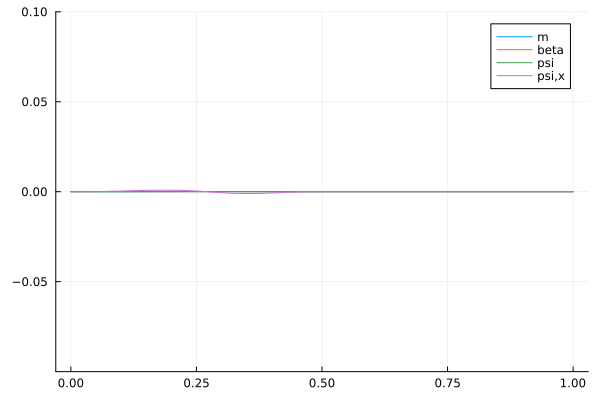

In [103]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:1:100
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.1, 0.1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 20)

In [432]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:290#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

In [51]:
epsilon(dt,dx)

0.015625